**Import libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**Đọc dữ liệu**

In [ ]:
dataset_path = './creditcard.csv'
df = pd.read_csv(dataset_path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
dataset_arr = df.to_numpy()
X = dataset_arr[:, :-1].astype(np.float64)
y = dataset_arr[:, -1].astype(np.int64)

**Thêm bias vào X**

In [4]:
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)

**One-hot encoding label**

In [5]:
n_classes = len(np.unique(y))
n_samples = y.shape[0]

y_encoded = np.zeros((n_samples, n_classes))
y_encoded[np.arange(n_samples), y] = 1

**Chia tập train, val, test**

In [6]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(X_b, y_encoded, test_size=val_size, random_state=random_state, shuffle=is_shuffle)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=test_size, random_state=random_state, shuffle=is_shuffle)

**Chuẩn hóa dữ liệu**

In [7]:
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

**Cài đặt các hàm quan trọng**

In [ ]:
def softmax(z):
    exp_z = np.exp(z)/np.sum(np.exp(z), axis=1, keepdims=True)
    return exp_z

def predict(X, theta):
    z = np.dot(X, theta)
    y_hat = softmax(z)
    return y_hat

def cross_entropy_loss(y, y_hat):
    loss = -np.sum(y * np.log(y_hat))/y.shape[0]
    return loss

def compute_gradient(X, y, y_hat):
    gradient = np.dot(X.T, (y_hat - y))/X.shape[0]
    return gradient

def update_theta(theta, gradient, learning_rate):
    theta = theta - learning_rate * gradient
    return theta

def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta)
    y_pred = np.argmax(y_hat, axis=1)
    y_true = np.argmax(y, axis=1)
    accuracy = np.mean(y_pred == y_true)
    return accuracy

**Khai báo các siêu tham số và khởi tạo weights**

In [9]:
lr = 0.01
epochs = 30
batch_size = 32
n_features = X_train.shape[1]

np.random.seed(random_state)
theta = np.random.uniform(size=(n_features, n_classes))

**Huấn luyện mô hình**

In [10]:
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(epochs):
    train_batch_losses = []
    val_batch_losses = []
    train_batch_accuracies = []
    val_batch_accuracies = []

    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]

        y_hat = predict(X_batch, theta)
        train_loss = cross_entropy_loss(y_batch, y_hat)
        gradient = compute_gradient(X_batch, y_batch, y_hat)
        theta = update_theta(theta, gradient, lr)

        train_batch_losses.append(train_loss)

        train_accuracy = compute_accuracy(X_batch, y_batch, theta)
        train_batch_accuracies.append(train_accuracy)

        y_hat_val = predict(X_val, theta)
        val_loss = cross_entropy_loss(y_val, y_hat_val)
        val_batch_losses.append(val_loss)

        val_accuracy = compute_accuracy(X_val, y_val, theta)
        val_batch_accuracies.append(val_accuracy)

    train_losses.append(np.mean(train_batch_losses))
    val_losses.append(np.mean(val_batch_losses))
    train_accuracies.append(np.mean(train_batch_accuracies))
    val_accuracies.append(np.mean(val_batch_accuracies))

    print(f'Epoch {epoch+1}/{epochs} - Train Loss: {train_losses[-1]:.4f} - Train Accuracy: {train_accuracies[-1]:.4f} - Val Loss: {val_losses[-1]:.4f} - Val Accuracy: {val_accuracies[-1]:.4f}')


Epoch 1/30 - Train Loss: 0.0461 - Train Accuracy: 0.9931 - Val Loss: 0.0448 - Val Accuracy: 0.9933
Epoch 2/30 - Train Loss: 0.0090 - Train Accuracy: 0.9991 - Val Loss: 0.0082 - Val Accuracy: 0.9993
Epoch 3/30 - Train Loss: 0.0068 - Train Accuracy: 0.9991 - Val Loss: 0.0060 - Val Accuracy: 0.9993
Epoch 4/30 - Train Loss: 0.0059 - Train Accuracy: 0.9991 - Val Loss: 0.0052 - Val Accuracy: 0.9993
Epoch 5/30 - Train Loss: 0.0055 - Train Accuracy: 0.9991 - Val Loss: 0.0047 - Val Accuracy: 0.9993
Epoch 6/30 - Train Loss: 0.0052 - Train Accuracy: 0.9991 - Val Loss: 0.0044 - Val Accuracy: 0.9993
Epoch 7/30 - Train Loss: 0.0050 - Train Accuracy: 0.9991 - Val Loss: 0.0042 - Val Accuracy: 0.9993
Epoch 8/30 - Train Loss: 0.0048 - Train Accuracy: 0.9991 - Val Loss: 0.0040 - Val Accuracy: 0.9993
Epoch 9/30 - Train Loss: 0.0047 - Train Accuracy: 0.9991 - Val Loss: 0.0039 - Val Accuracy: 0.9993
Epoch 10/30 - Train Loss: 0.0046 - Train Accuracy: 0.9991 - Val Loss: 0.0039 - Val Accuracy: 0.9993
Epoch 11/

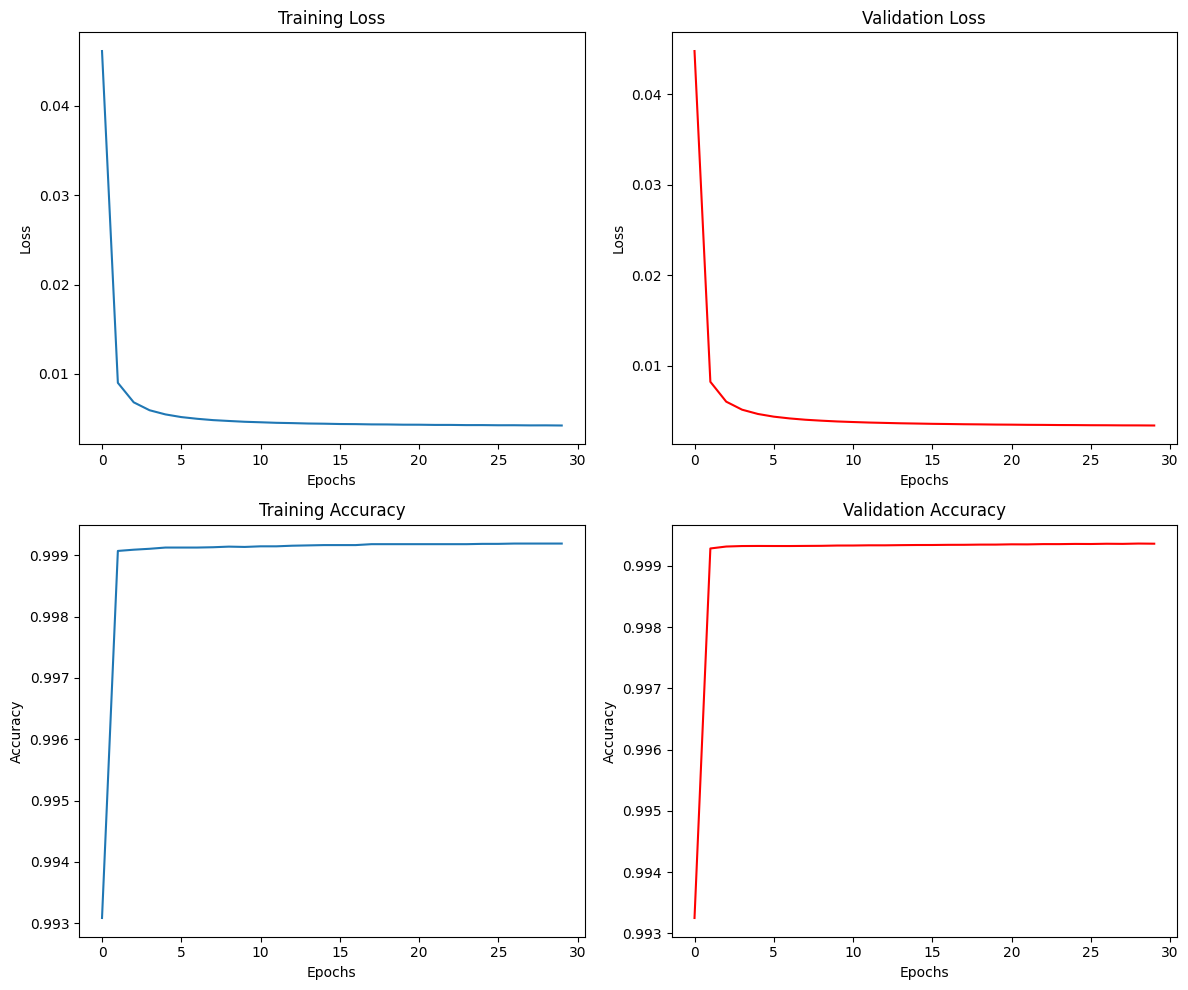

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epochs', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, color='red')
ax[0, 1].set(xlabel='Epochs', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accuracies)
ax[1, 0].set(xlabel='Epochs', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accuracies, color='red')
ax[1, 1].set(xlabel='Epochs', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.tight_layout()
plt.show()

**Đánh giá mô hình**

In [12]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print(f'Validation Set Accuracy: {val_set_acc:.2f}')
print(f'Test Set Accuracy: {test_set_acc:.2f}')

Validation Set Accuracy: 1.00
Test Set Accuracy: 1.00
